<a href="https://colab.research.google.com/github/Prakashh-Das/Mechine-Learning/blob/main/Medical_Bill_Charges_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from urllib.request import urlretrieve
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
medical_charges_url = 'http://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x78a73b23e5d0>)

In [ ]:
medical_charges_df = pd.read_csv('medical.csv')

In [ ]:
medical_charges_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
medical_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_charges_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


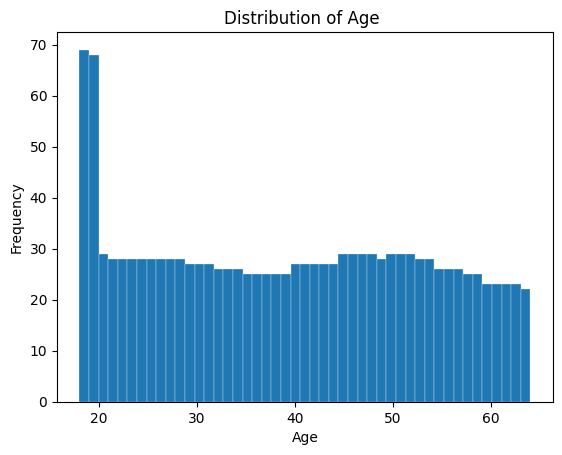

In [ ]:
plt.hist(medical_charges_df['age'], bins= 47, edgecolor = 'white', linewidth = 0.2)

plt.title('Distribution of Age ')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


In [ ]:
medical_charges_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


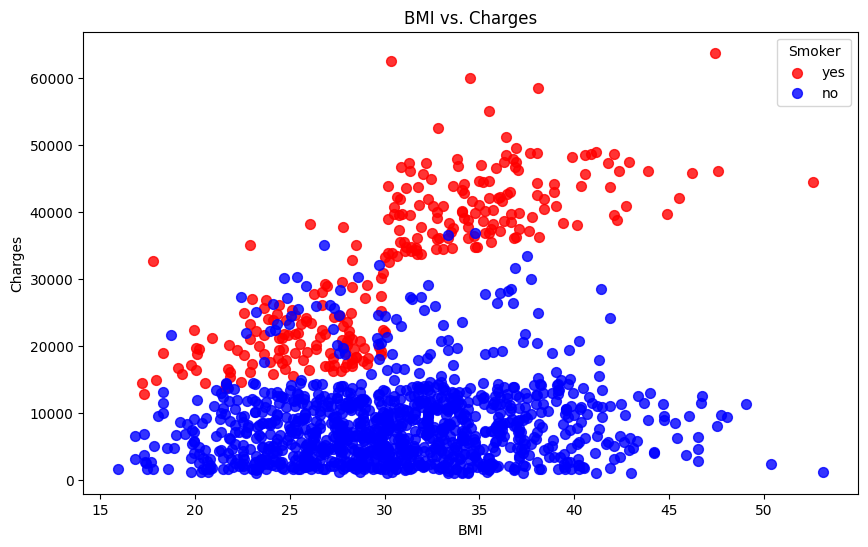

In [ ]:
colors = {'yes': 'red', 'no': 'blue'}

plt.figure(figsize=(10, 6))
for smoker_status in colors:
    subset = medical_charges_df[medical_charges_df['smoker'] == smoker_status]
    plt.scatter(subset['bmi'], subset['charges'],
                c=colors[smoker_status],
                label=smoker_status,
                alpha=0.8,
                s=50)

plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

In [ ]:
medical_charges_df.charges.corr(medical_charges_df.age)

0.2990081933306476

In [ ]:
medical_charges_df.charges.corr(medical_charges_df.bmi)

0.19834096883362895

In [ ]:
medical_charges_df.charges.corr(medical_charges_df.children)

0.06799822684790478

In [ ]:
smoker_value = {'no' : 0, 'yes' : 1}
smoker_numeric = medical_charges_df.smoker.map(smoker_value)
medical_charges_df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
medical_df_numeric = pd.get_dummies(medical_charges_df, drop_first=True)

medical_df_numeric.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


In [ ]:
non_smoker_df = medical_charges_df[medical_charges_df.smoker == 'no']

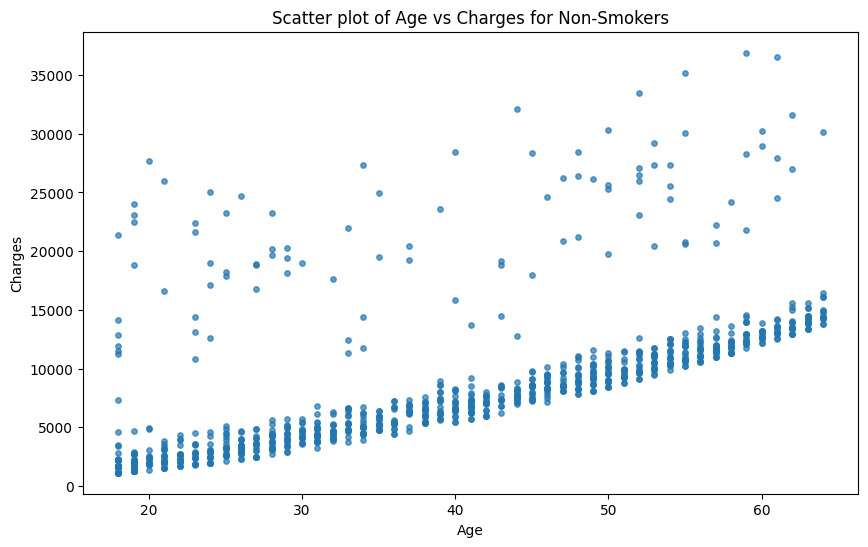

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(non_smoker_df['age'], non_smoker_df['charges'], alpha=0.7, s=15)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatter plot of Age vs Charges for Non-Smokers')
plt.show()

In [ ]:
def estimate_charges_fun(age, w, b):
    return w * age + b

In [ ]:
w = 50
b = 100

In [ ]:
estimate_charges_fun(30, w, b)

1600

In [ ]:
ages = non_smoker_df.age
estimate_charges = estimate_charges_fun(ages, w, b)

Text(0, 0.5, 'Estimated Charges')

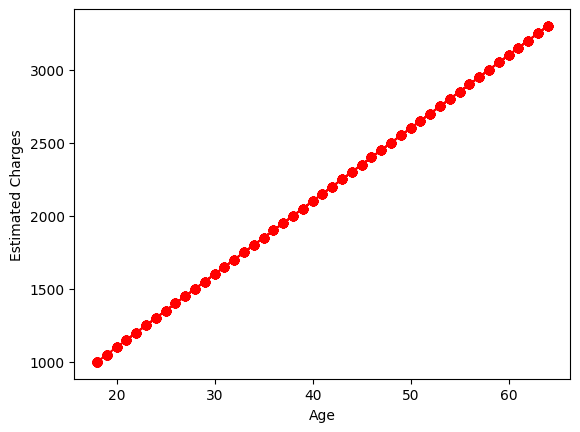

In [ ]:
plt.plot(ages, estimate_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

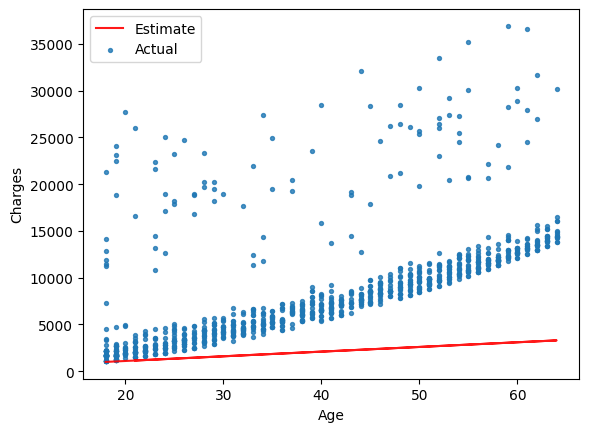

In [ ]:
target = non_smoker_df.charges

plt.plot(ages, estimate_charges, 'r', alpha = 0.9)
plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

In [ ]:
type(estimate_charges_fun)

function

In [ ]:
def try_parameters(t_w, t_b):
    ages_try = non_smoker_df['age']
    target_try = non_smoker_df['charges']

    estimate_charges_try = estimate_charges_fun(ages_try, t_w, t_b)

    plt.plot(ages_try, estimate_charges_try, 'r', alpha = 0.9)
    plt.scatter(ages_try, target_try, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

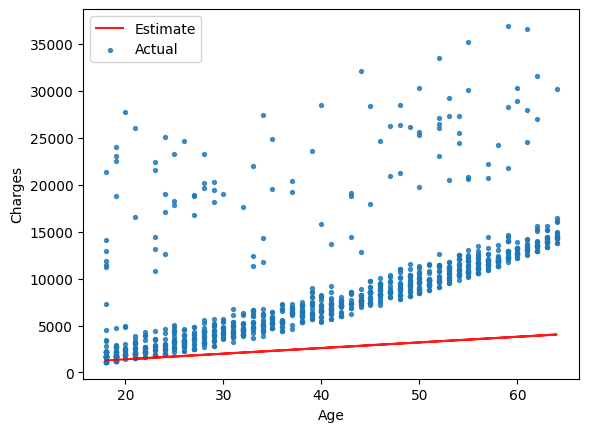

In [ ]:
try_parameters(60, 200)

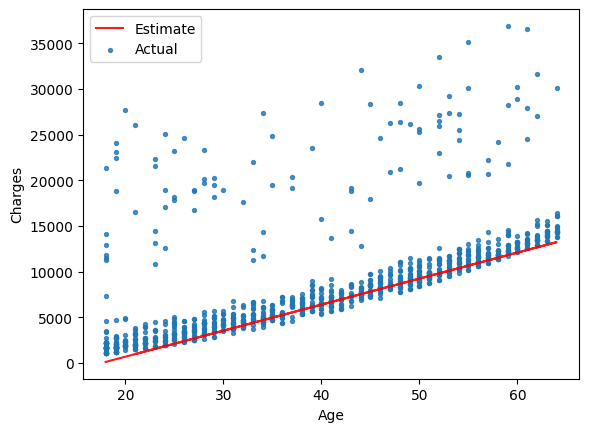

In [ ]:
try_parameters(285, -5000)

In [ ]:
targets = non_smoker_df.charges
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [ ]:
predictions = estimate_charges
predictions

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
w = 50
b = 100

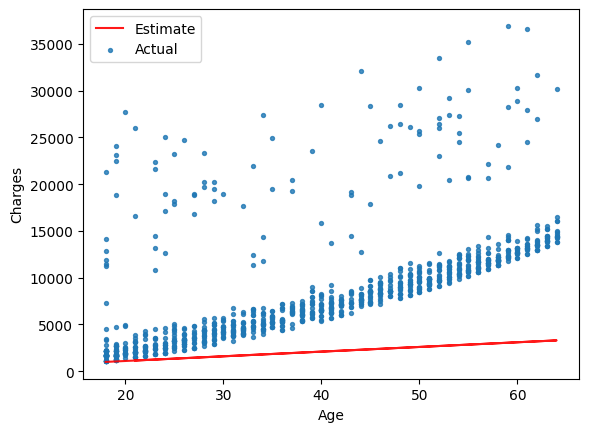

In [ ]:
try_parameters(w, b)

In [ ]:
targets = non_smoker_df['charges']
predicted = estimate_charges_fun(non_smoker_df.age, w, b)

In [ ]:
rmse(targets, predicted)

8461.949562575493

In [ ]:
def try_parameters_function_loss(t_w, t_b):
    ages_try = non_smoker_df['age']
    target_try = non_smoker_df['charges']

    predictions = estimate_charges_fun(ages_try, t_w, t_b)

    plt.plot(ages_try, predictions, 'r', alpha = 0.9)
    plt.scatter(ages_try, target_try, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['predictions', 'Actual'])

    loss = rmse(target_try, predictions)
    print('RMSE Loss: ', loss)

RMSE Loss:  8461.949562575493


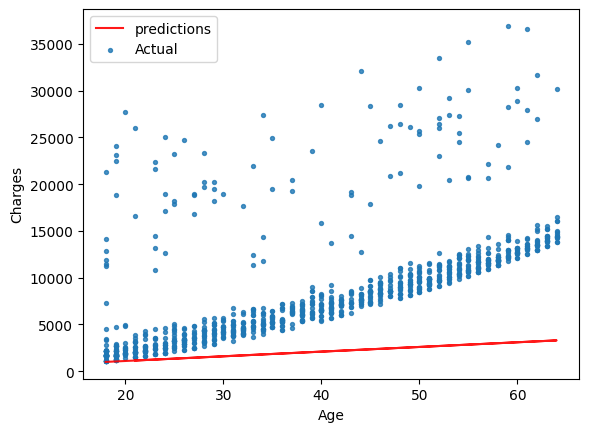

In [ ]:
try_parameters_function_loss(50, 100)

RMSE Loss:  5165.564313112629


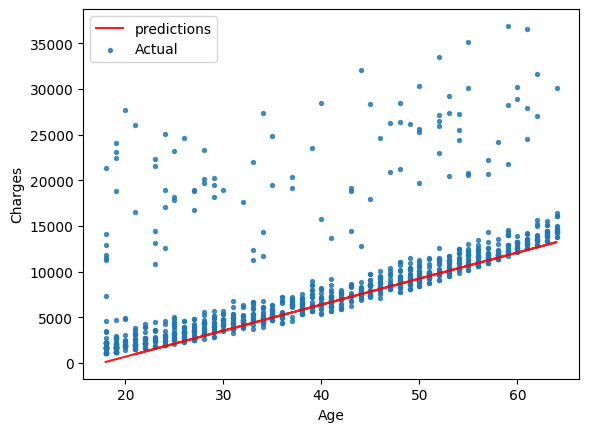

In [ ]:
try_parameters_function_loss(285, -5000)

RMSE Loss:  4700.736524304107


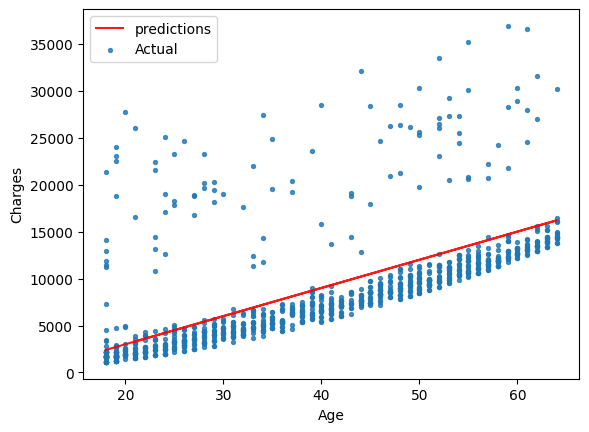

In [ ]:
try_parameters_function_loss(300, -3000)